In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-trends-dataset/trends.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv('/kaggle/input/google-trends-dataset/trends.csv')

In [4]:
df.head(10)

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
5,Global,2001,Men,1,Nostradamus
6,Global,2001,Men,2,Osama bin Laden
7,Global,2001,Men,3,Eminem
8,Global,2001,Men,4,Michael Jackson
9,Global,2001,Men,5,Howard Stern


In [5]:
df.shape

(26955, 5)

In [8]:
df.isnull().sum()

location    0
year        0
category    0
rank        0
query       0
dtype: int64

In [10]:
df.dtypes

location    object
year         int64
category    object
rank         int64
query       object
dtype: object

In [12]:
df.describe()

,year,rank
count,26955.000000,26955.00000
mean,2015.243369,3.00000
std,3.564683,1.41424
min,2001.000000,1.00000
25%,2013.000000,2.00000
50%,2016.000000,3.00000
75%,2018.000000,4.00000
max,2020.000000,5.00000


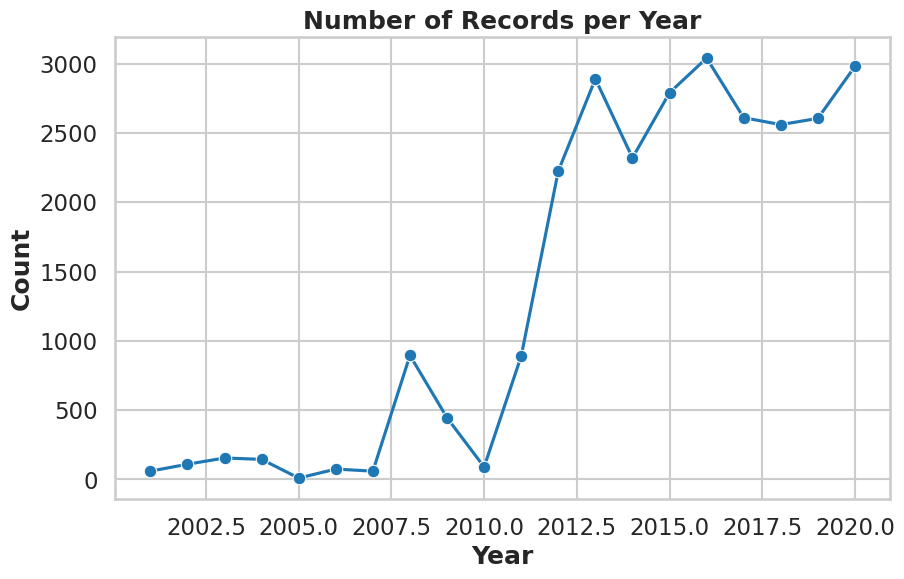

In [20]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10,6))
year_counts = df['year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title("Number of Records per Year", fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.show()


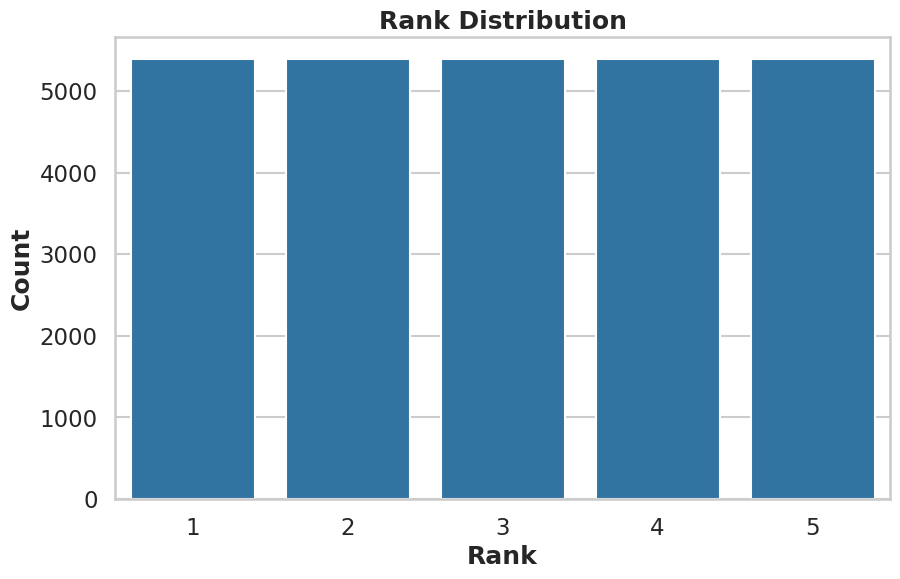

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='rank', data=df)
plt.title("Rank Distribution",fontweight='bold')
plt.xlabel("Rank",fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.show()


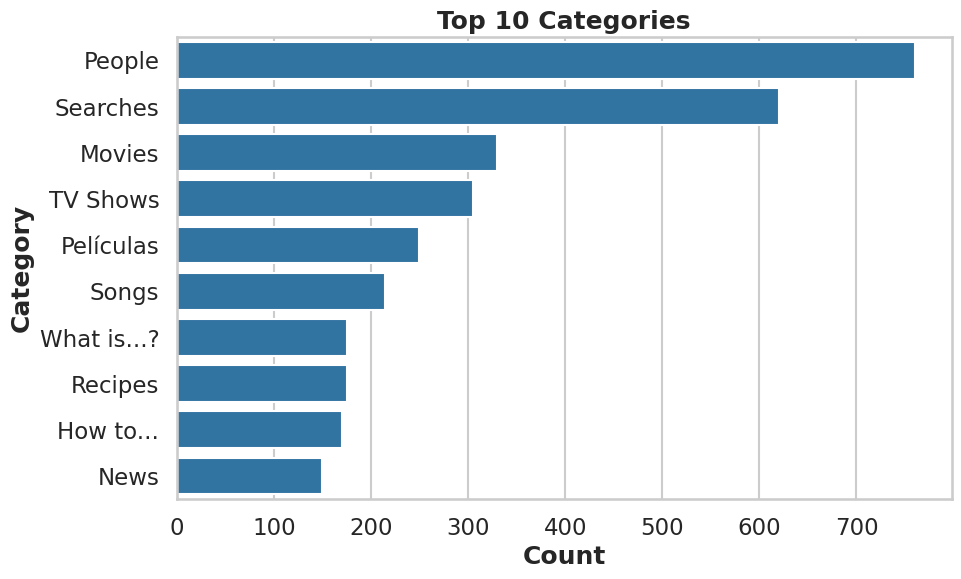

In [26]:
plt.figure(figsize=(10,6))
top_categories = df['category'].value_counts().head(10).index
sns.countplot(y='category', data=df, order=top_categories)
plt.title("Top 10 Categories",fontweight='bold')
plt.xlabel("Count",fontweight='bold')
plt.ylabel("Category",fontweight='bold')
plt.show()


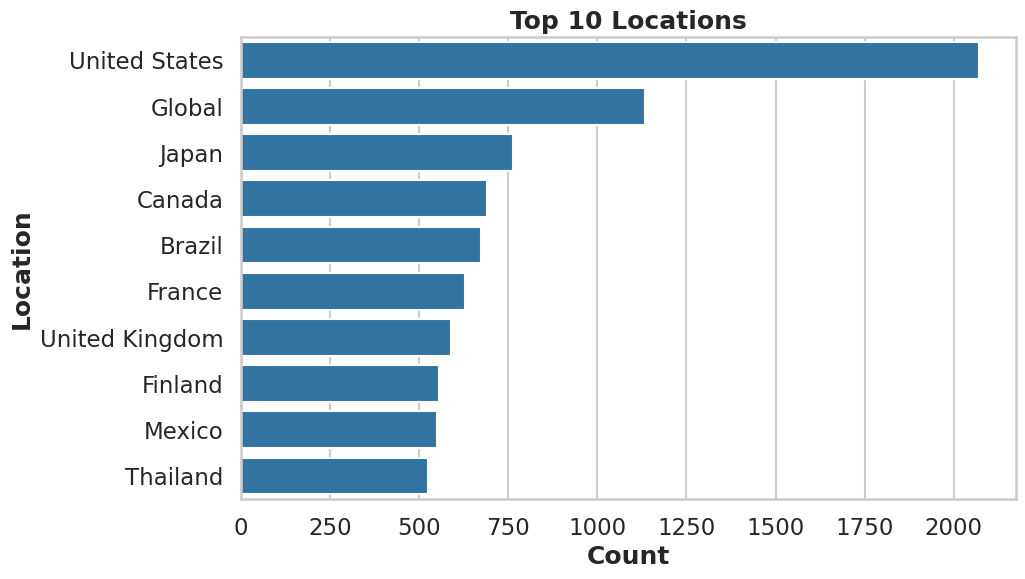

In [27]:
plt.figure(figsize=(10,6))
top_locations = df['location'].value_counts().head(10).index
sns.countplot(y='location', data=df, order=top_locations)
plt.title("Top 10 Locations",fontweight='bold')
plt.xlabel("Count",fontweight='bold')
plt.ylabel("Location",fontweight='bold')
plt.show()


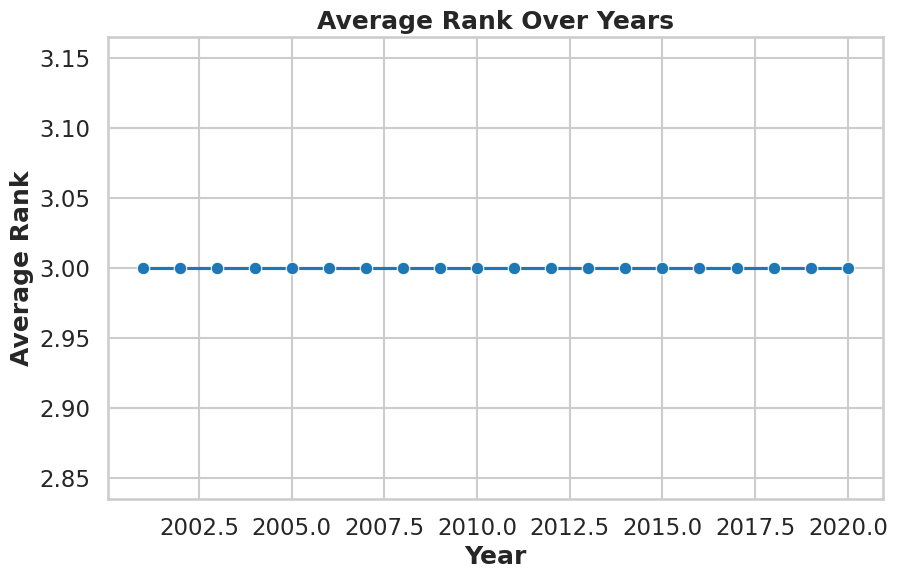

In [30]:
plt.figure(figsize=(10,6))
avg_rank = df.groupby('year')['rank'].mean().reset_index()
sns.lineplot(x='year', y='rank', data=avg_rank, marker='o')
plt.title("Average Rank Over Years",fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Average Rank",fontweight='bold')
plt.show()


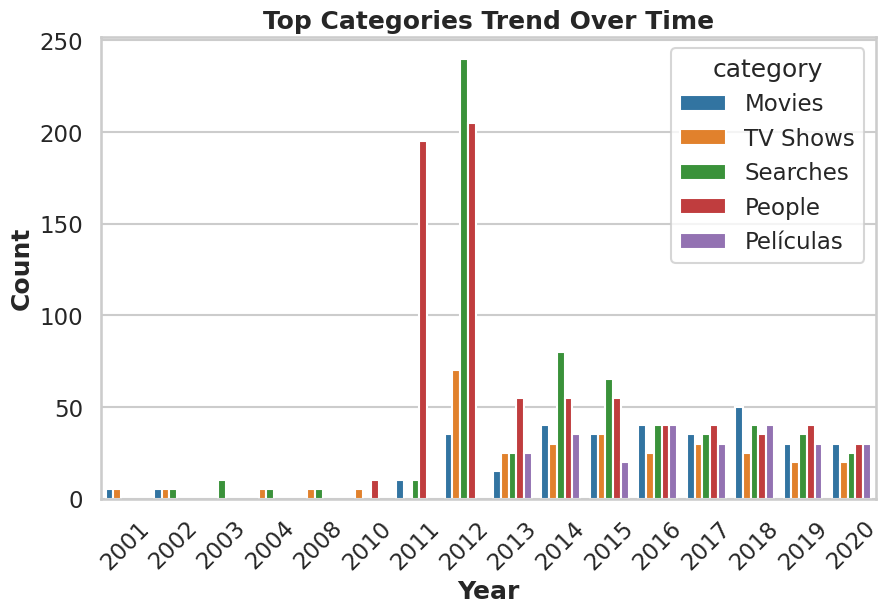

In [32]:
top5 = df['category'].value_counts().head(5).index
filtered = df[df['category'].isin(top5)]

plt.figure(figsize=(10,6))
sns.countplot(x='year', hue='category', data=filtered)
plt.title("Top Categories Trend Over Time",fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.xticks(rotation=45)
plt.show()


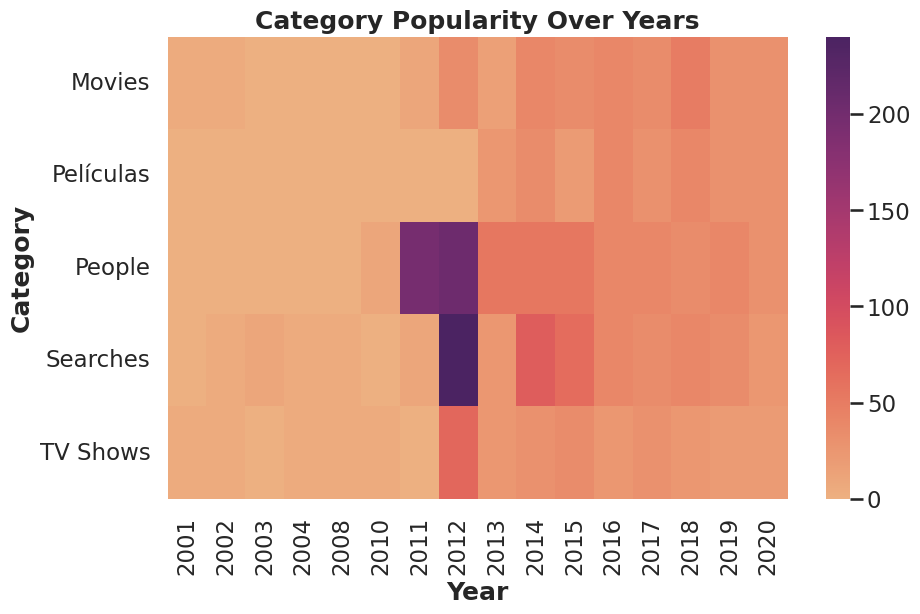

In [36]:
top5 = df['category'].value_counts().head(5).index
filtered = df[df['category'].isin(top5)]

pivot = filtered.pivot_table(index='category', columns='year', aggfunc='size', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='flare')
plt.title("Category Popularity Over Years",fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Category",fontweight='bold')
plt.show()
